## 1. Library

In [ ]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *

## 2. Regression Decision Tree

#### 1) Using Array Data Set

In [3]:
regr = tree.DecisionTreeRegressor(max_depth=2)
boston = load_boston()
regr.fit(boston.data, boston.target)

viz = dtreeviz(regr,
               boston.data,
               boston.target,
               target_name='price',
               feature_names=boston.feature_names)
              
viz.view()         

#### 2) Using DataFrame Data Set

In [18]:
from sklearn.datasets import load_boston

boston = load_boston()
data = boston['data']
target = boston['target']

data = pd.DataFrame(data)
target = pd.DataFrame(target)

data.columns = boston['feature_names']
target.columns = ['y']

df = pd.merge(data, target, left_index=True, right_index=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
regr = tree.DecisionTreeRegressor(max_depth=2)
boston = load_boston()
regr.fit(data, target)

viz = dtreeviz(regr,
               data.values, # 주의 : array 배열로 변환 필요
               target.values, 
               target_name='y',
               feature_names=data.columns) # 주의 : X 인자 Column 명
              
viz.view()     

In [28]:
from IPython.display import Image

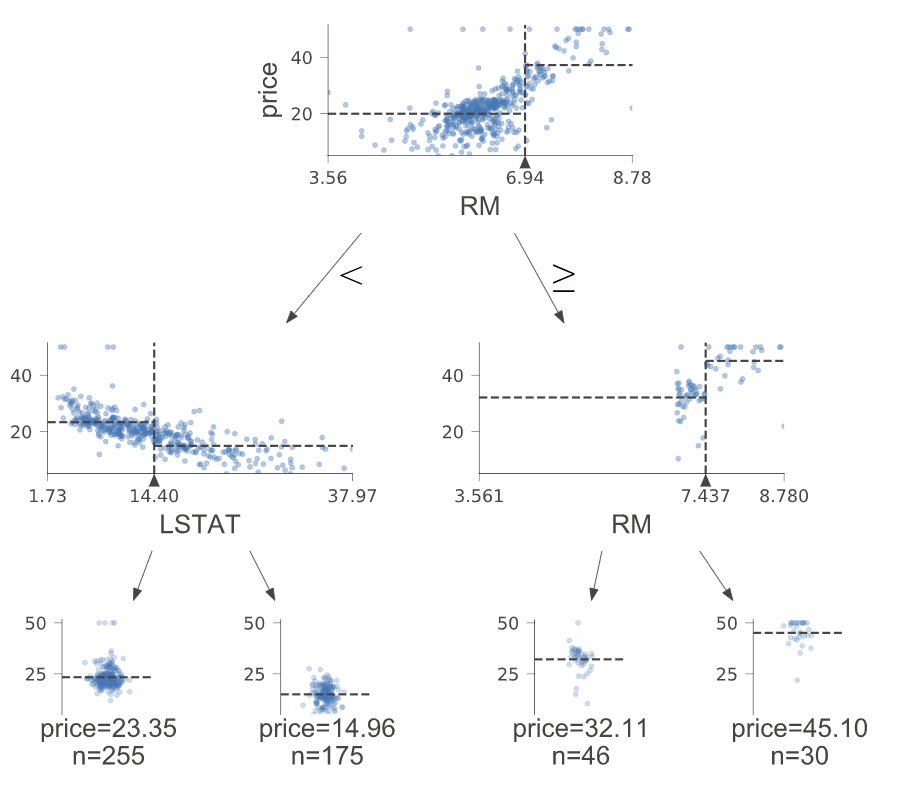

In [42]:
Image('Capture Images/Regression Decision Tree.png',  width= 640, height = 480)

## 3. Classification Decision Tree

In [43]:
classifier = tree.DecisionTreeClassifier(max_depth=2)  # limit depth of tree
iris = load_iris()
classifier.fit(iris.data, iris.target)

viz = dtreeviz(classifier, 
               iris.data, 
               iris.target,
               target_name='variety',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
              )  
              
viz.view() 

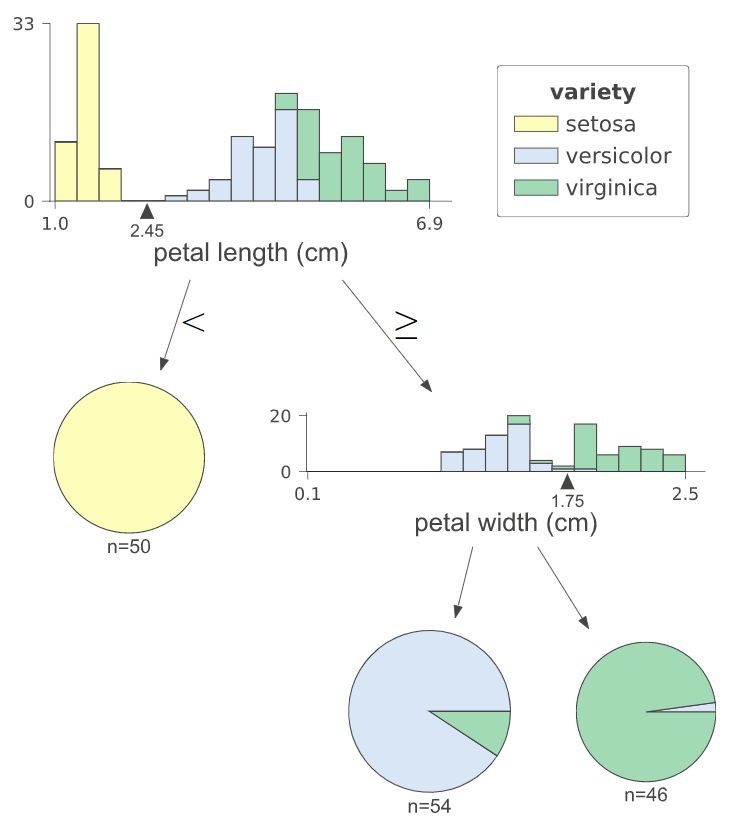

In [44]:
Image('Capture Images/Classification Decision Tree.png',  width= 640, height = 480)

## 4. Prediction Path

In [78]:
regr = tree.DecisionTreeRegressor(max_depth=2)  # limit depth of tree
diabetes = load_diabetes()
regr.fit(diabetes.data, diabetes.target)
X = diabetes.data[np.random.randint(0, len(diabetes.data)),:]  # random sample from training

viz = dtreeviz(regr,
               diabetes.data, 
               diabetes.target, 
               target_name='value', 
               orientation ='LR',  # left-right orientation
               feature_names=diabetes.feature_names,
               X=X)  # need to give single observation for prediction
              
viz.view()  

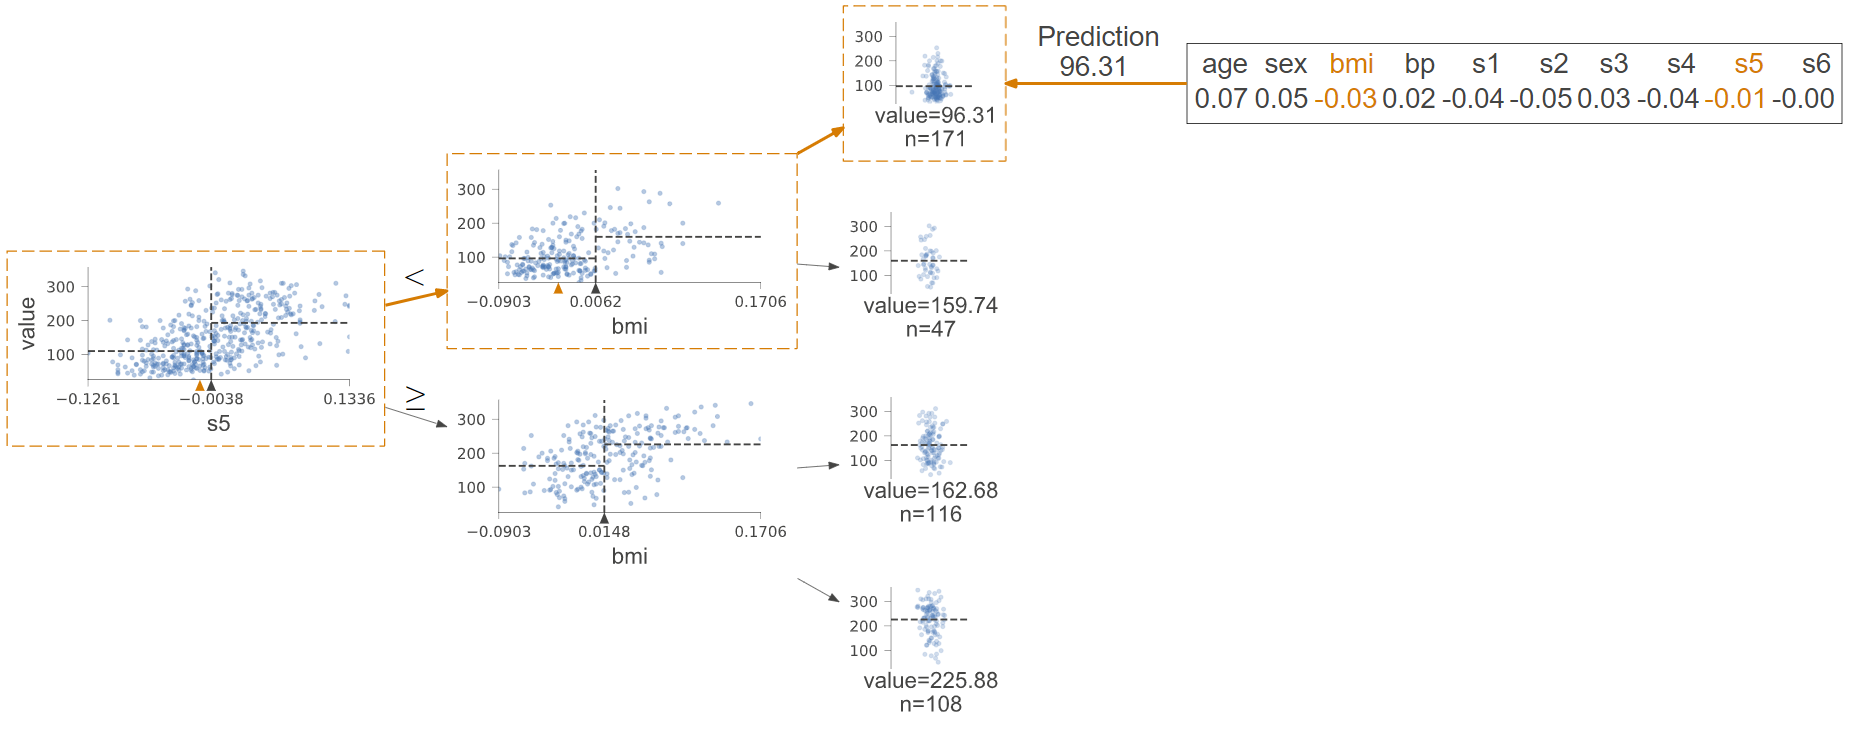

In [81]:
Image('Capture Images/Prediction Path.png',  width= 1080, height = 720)

## 5. Decision tree without scatterplot or histograms for decision nodes

In [82]:
classifier = tree.DecisionTreeClassifier(max_depth=4)  # limit depth of tree
cancer = load_breast_cancer()
classifier.fit(cancer.data, cancer.target)

viz = dtreeviz(classifier,
              cancer.data,
              cancer.target,
              target_name='cancer',
              feature_names=cancer.feature_names, 
              class_names=["malignant", "benign"],
              fancy=False )  # fance=False to remove histograms/scatterplots from decision nodes
              
viz.view() 

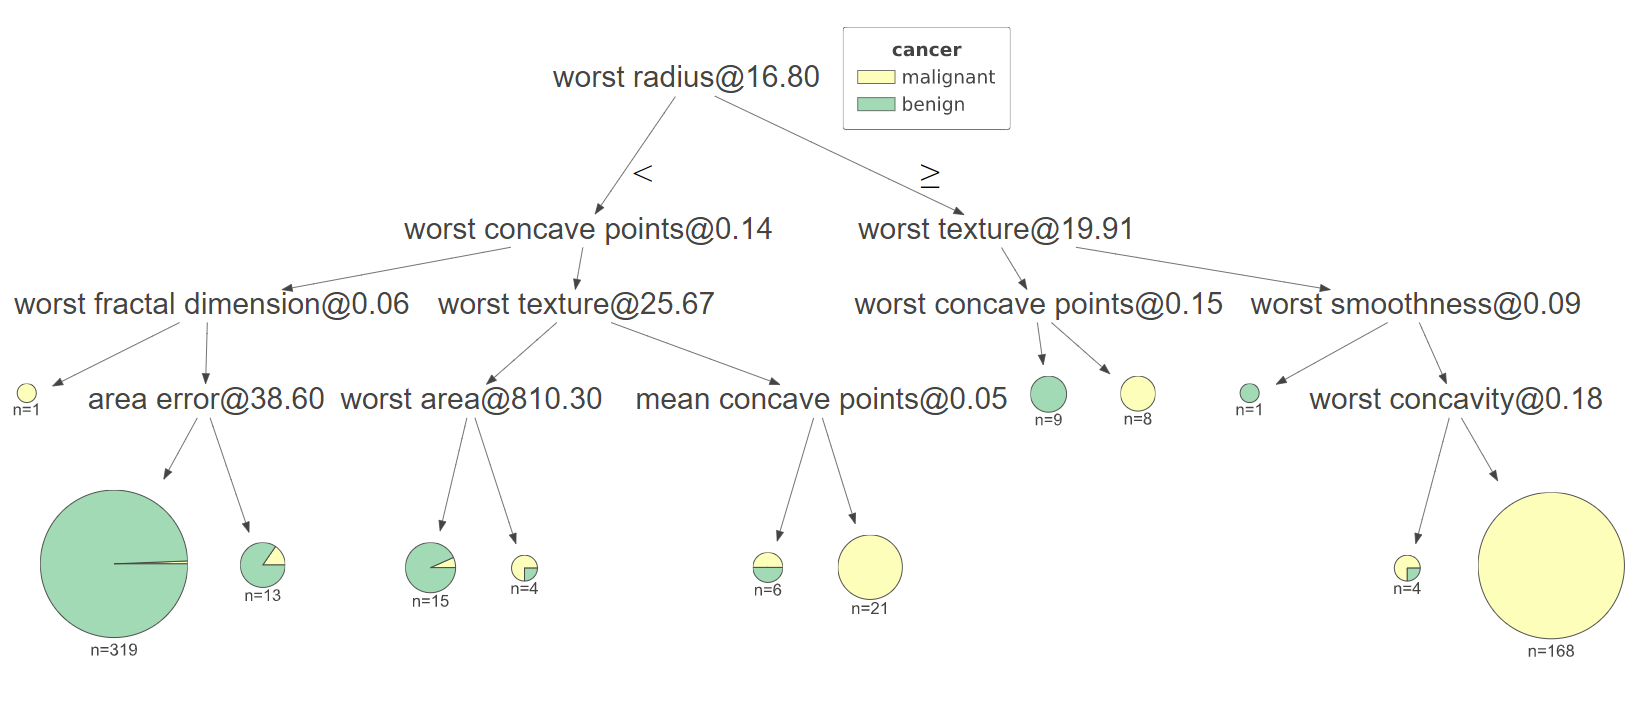

In [83]:
Image('Capture Images/Classification Decision Tree With Node.png',  width= 1080, height = 720)

## 6. Regression univariate feature-target space

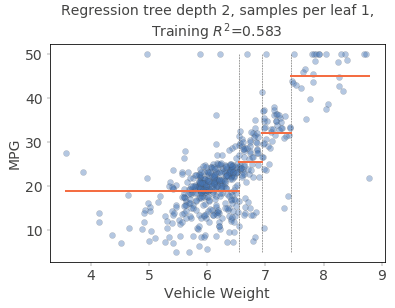

In [93]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

boston = load_boston()
data = boston['data']
target = boston['target']

data = pd.DataFrame(data)
target = pd.DataFrame(target)

data.columns = boston['feature_names']
target.columns = ['y']

df = pd.merge(data, target, left_index=True, right_index=True)

X_train, y_train = df.drop('y', axis=1), df['y']

fig = plt.figure()
ax = fig.gca()
t = rtreeviz_univar(ax,
                    X_train['RM'], y_train, # uni column name
                    max_depth=2,
                    feature_name='RM',
                    target_name='y',
                    fontsize=14)
plt.show()

## 7. Regression bivariate feature-target space

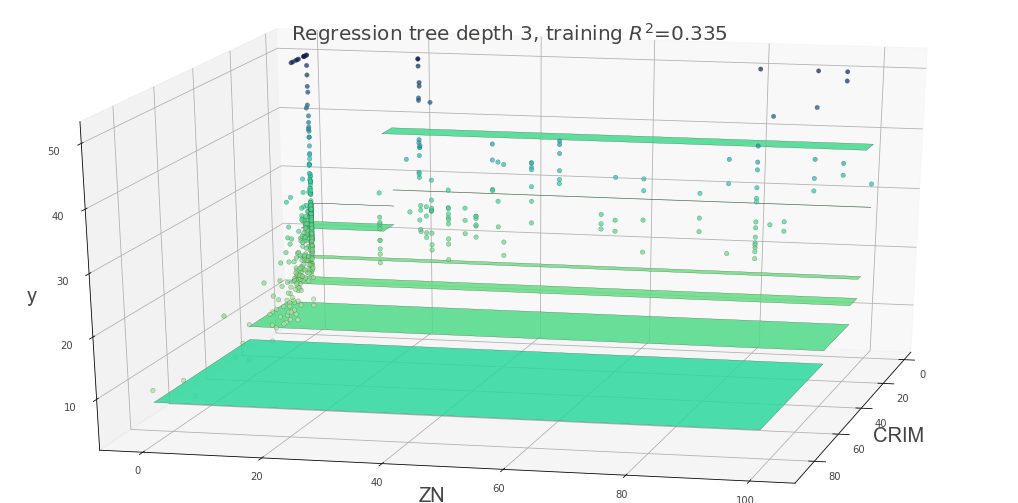

In [115]:
from mpl_toolkits.mplot3d import Axes3D
from dtreeviz.trees import *


X = df.drop('y', axis=1)
y = df['y']

features = [0, 1] # column number 0 = CRIM, 1 = ZN
X = X.values[:,features]
figsize = (18,9)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

t = rtreeviz_bivar_3D(ax,
                      X, y,
                      max_depth=3,
                      feature_names=['CRIM', 'ZN'],
                      target_name='y',
                      fontsize=20,
                      elev=20,
                      azim=13,
                      dist=8.2,
                      show={'splits','title'})
plt.show()

## 8. Regression bivariate feature-target space heatmap

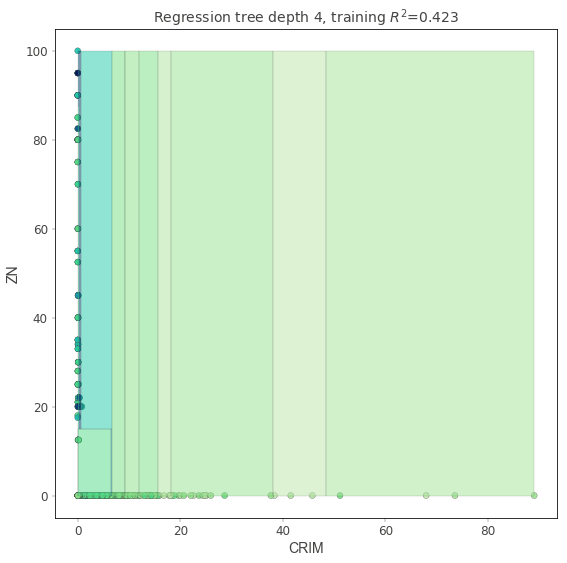

In [119]:
X = df.drop('y', axis=1)
y = df['y']

features = [0, 1] # column number 0 = CRIM, 1 = ZN
X = X.values[:, features]
figsize = (9, 9)
fig, ax = plt.subplots(1, 1, figsize=figsize)
t = rtreeviz_bivar_heatmap(ax,
                           X, y,
                           max_depth=4,
                           feature_names=['CRIM', 'ZN'],
                           fontsize=14)
plt.show()

## 9. Classification univariate feature-target space

In [121]:
Iris = load_iris()
data = Iris['data']
target = Iris['target']

data = pd.DataFrame(data)
target = pd.DataFrame(target)

data.columns = Iris['feature_names']
target.columns = ['y']

df = pd.merge(data, target, left_index=True, right_index=True)

In [124]:

Iris = load_iris()

In [125]:
Iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
from dtreeviz.trees import *

Iris = load_iris()
data = Iris['data']
target = Iris['target']

data = pd.DataFrame(data)
target = pd.DataFrame(target)

data.columns = Iris['feature_names']
target.columns = ['y']

df = pd.merge(data, target, left_index=True, right_index=True)




know = pd.read_csv("data/knowledge.csv")
class_names = ['very_low', 'Low', 'Middle', 'High']
know['UNS'] = know['UNS'].map({n: i for i, n in enumerate(class_names)})

features=[4,3]
X_train = know.drop('UNS', axis=1)
y_train = know['UNS']
X_train = X_train.values[:, features]
figsize = (6,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
ctreeviz_bivar(ax, X_train, y_train, max_depth=3,
               feature_names = ['PEG','LPR'],
               class_names=class_names,
               target_name='Knowledge')
plt.tight_layout()
plt.show()

## 10. Classification bivariate feature-target space

In [ ]:
from dtreeviz.trees import *

know = pd.read_csv("data/knowledge.csv")
class_names = ['very_low', 'Low', 'Middle', 'High']
know['UNS'] = know['UNS'].map({n: i for i, n in enumerate(class_names)})

features=[4,3]
X_train = know.drop('UNS', axis=1)
y_train = know['UNS']
X_train = X_train.values[:, features]
figsize = (6,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
ctreeviz_bivar(ax, X_train, y_train, max_depth=3,
               feature_names = ['PEG','LPR'],
               class_names=class_names,
               target_name='Knowledge')
plt.tight_layout()
plt.show()

## 11. Customize Colors

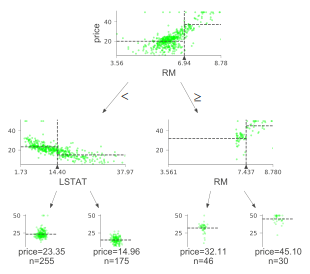

In [130]:
from dtreeviz.trees import *
regr = tree.DecisionTreeRegressor(max_depth=2)
boston = load_boston()
regr.fit(boston.data, boston.target)
dtreeviz(regr,
                        boston.data,
                        boston.target,
                        target_name='price',
                        feature_names=boston.feature_names,
                        colors={'scatter_marker': '#00ff00'})

COLORS = {'scatter_edge': GREY,         
          'scatter_marker': BLUE,
          'split_line': GREY,
          'mean_line': '#f46d43',
          'axis_label': GREY,
          'title': GREY,
          'legend_title': GREY,
          'legend_edge': GREY,
          'edge': GREY,
          'color_map_min': '#c7e9b4',
          'color_map_max': '#081d58',
          'classes': color_blind_friendly_colors,
          'rect_edge': GREY,
          'text': GREY,
          'highlight': HIGHLIGHT_COLOR,
          'wedge': WEDGE_COLOR,
          'text_wedge': WEDGE_COLOR,
          'arrow': GREY,
          'node_label': GREY,
          'tick_label': GREY,
          'leaf_label': GREY,
          'pie': GREY,
          }